In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [3]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


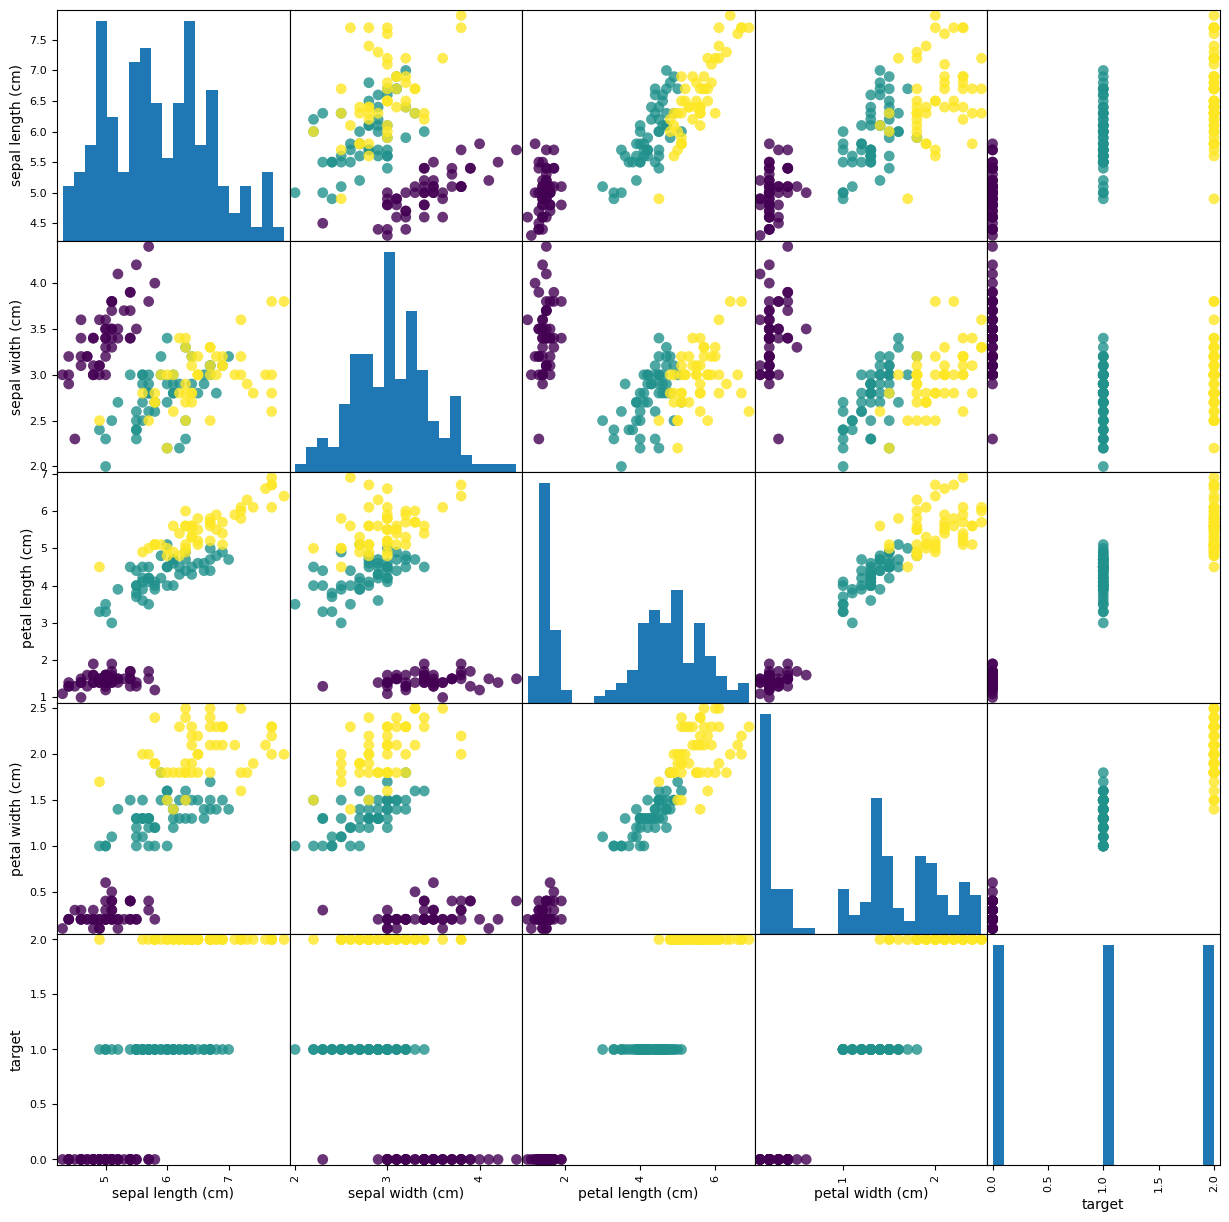

In [4]:
pd.plotting.scatter_matrix(iris_df, c=iris_df['target'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

In [5]:
X = iris_df.drop('target', axis=1)
x = StandardScaler().fit_transform(X)

In [6]:
covariance_matrix = np.cov(x.T)
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [8]:
principal_components = eigenvectors[:, :2]
transformed_data = np.dot(x, principal_components)

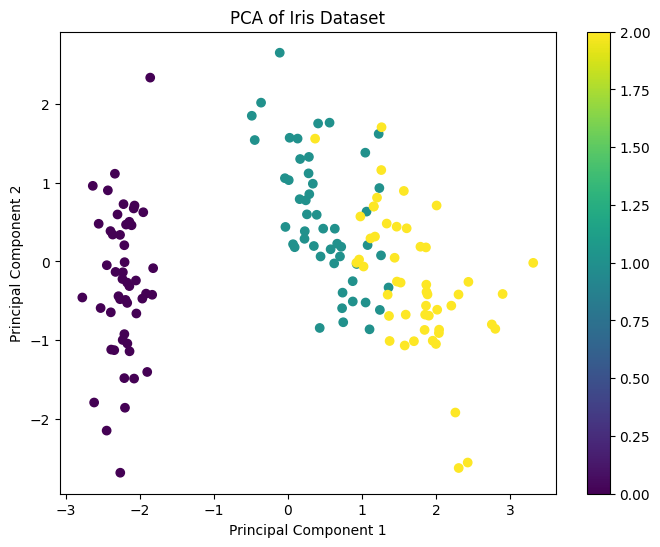

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=iris_df['target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()

**Question 2.**


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [14]:
image = Image.open('Grey scale.png').convert('L')
image_array = np.array(image)
print(image)

<PIL.Image.Image image mode=L size=300x213 at 0x7CC3A6AA5180>


In [15]:
rows, cols = image_array.shape
image_data = image_array.reshape(rows * cols, 1)

In [18]:
n_components = min(image_data.shape[0], image_data.shape[1])
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(image_data)

In [19]:
reconstructed_data = pca.inverse_transform(reduced_data)
reconstructed_image = reconstructed_data.reshape(rows, cols)

Text(0.5, 1.0, 'Original Image')

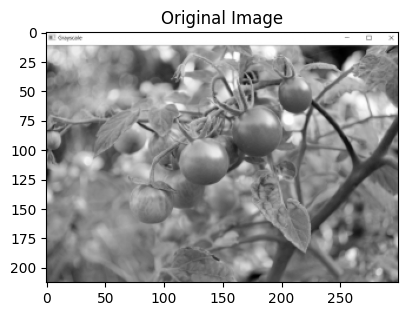

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

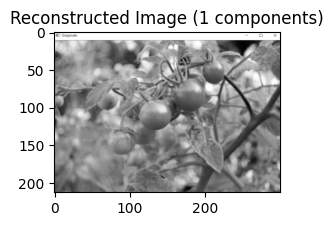

In [21]:
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image ({} components)'.format(n_components))
plt.show()

In [27]:
image = Image.open('Grey scale.png').convert('L')
image_array = np.array(image)
rows, cols = image_array.shape
image_data = image_array.reshape(rows * cols, 1)

Text(0.5, 1.0, 'Original Image')

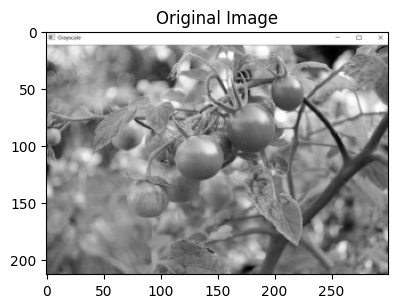

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

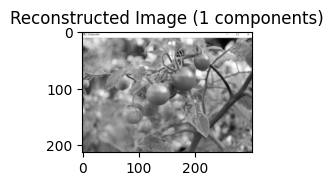

In [34]:
for i, n_components in enumerate([1]):
  pca = PCA(n_components=n_components)
  reduced_data = pca.fit_transform(image_data)
  reconstructed_data = pca.inverse_transform(reduced_data)
  reconstructed_image = reconstructed_data.reshape(rows, cols)
plt.subplot(2, 3, i + 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image ({} components)'.format(n_components))
plt.tight_layout()
plt.show()

Question **3**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
data = pd.read_csv('Wine.csv')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [47]:
X = data.drop('fixed acidity', axis=1)
y = data['fixed acidity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4408867972859236
R-squared: 0.8739857047112449


In [51]:
tolerance = 0.5

In [54]:
accurate_predictions = np.abs(y_test - y_pred) <= tolerance
accuracy = accurate_predictions.mean()
print(f"Accuaracy is: {accuracy}")

Accuaracy is: 0.6064139941690962


In [55]:
precision = accurate_predictions[y_pred != 0].mean()
print(f"Precision is: {precision}")

Precision is: 0.6064139941690962


In [56]:
relevant_items = np.abs(y_test) <= tolerance
recall = accurate_predictions[relevant_items].mean()
print(f"Recall is: {recall}")

Recall is: nan


In [59]:
X_filtered = X.loc[iris_df.index]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, iris_df['target'], test_size=0.3, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components_list = [2, 5, 10]
accuracies = []
for n_components in n_components_list:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)

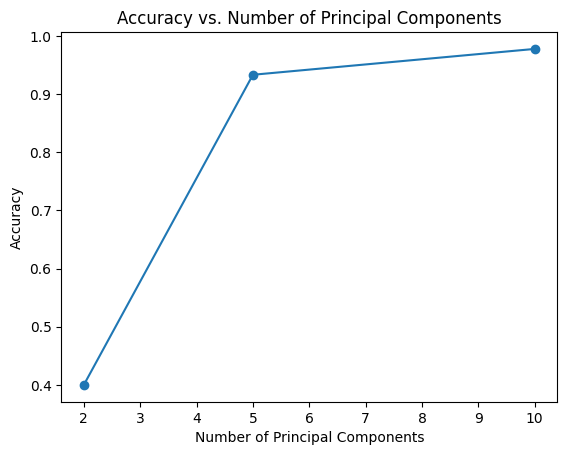

In [61]:
plt.plot(n_components_list, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.show()